In [ ]:
# 1. Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [ ]:
# 2. Import dataset from CSV file
# 2.1 Set "low_memory=False" to ensure the entire dataset is read
df = pd.read_csv('NYC_311_Service_Requests_2023.csv', low_memory=False)

In [ ]:
# Show memory usage performance for each column in the dataset before transformation
print(df.memory_usage(deep=True))

Index                                   132
Unique Key                         25804448
Created Date                      229014476
Closed Date                       225553031
Agency                            169614771
Agency Name                       270094608
Complaint Type                    209861701
Descriptor                        209368077
Location Type                     196651476
Incident Zip                      173331679
Incident Address                  211346214
Street Name                       197639548
Cross Street 1                    171720380
Cross Street 2                    172345204
Intersection Street 1             168386771
Intersection Street 2             169034233
Address Type                      181519470
City                              180105248
Landmark                          162033862
Facility Type                     103683376
Status                            177732406
Due Date                          103704317
Resolution Description          

In [ ]:
# 3. Transform column headers
# 3.1 Remove spaces before and after the text
# 3.2 Replace spaces within the text with "_"
# 3.3 Convert to lowercase
df.columns = df.columns.str.strip().str.replace(r'\s+', '_', regex=True).str.lower()

# Display all columns in the output
pd.set_option('display.max_columns', None)

# Show the first 5 rows of the DataFrame
df.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location
0,59889383,12/31/2023 11:59:42 PM,01/01/2024 01:51:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11375,63-10 108 STREET,108 STREET,63 AVENUE,63 ROAD,63 AVENUE,63 ROAD,ADDRESS,FOREST HILLS,108 STREET,NaN,Closed,NaN,The Police Department responded to the complai...,01/01/2024 01:51:05 AM,06 QUEENS,4.021460e+09,QUEENS,1025676.0,206981.0,MOBILE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.734695,-73.850521,"(40.734694673156454, -73.85052125577377)"
1,59887573,12/31/2023 11:59:39 PM,01/19/2024 02:37:37 PM,EDC,Economic Development Corporation,Noise - Helicopter,Other,Above Address,10023,25 WEST 73 STREET,WEST 73 STREET,CENTRAL PARK WEST,COLUMBUS AVENUE,CENTRAL PARK WEST,COLUMBUS AVENUE,ADDRESS,NEW YORK,WEST 73 STREET,NaN,Closed,NaN,The New York City Economic Development Corpora...,01/19/2024 02:37:41 PM,07 MANHATTAN,1.011260e+09,MANHATTAN,990853.0,222433.0,ONLINE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.777201,-73.976159,"(40.77720102455921, -73.976158989108)"
2,59892892,12/31/2023 11:59:29 PM,01/01/2024 04:06:24 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11355,143-34 BARCLAY AVENUE,BARCLAY AVENUE,BOWNE STREET,PARSONS BOULEVARD,BOWNE STREET,PARSONS BOULEVARD,ADDRESS,FLUSHING,BARCLAY AVENUE,NaN,Closed,NaN,The Police Department responded to the complai...,01/01/2024 04:06:28 AM,07 QUEENS,NaN,QUEENS,1033392.0,215955.0,MOBILE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.759286,-73.822614,"(40.759286493466355, -73.82261386696051)"
3,59893860,12/31/2023 11:59:29 PM,01/01/2024 01:51:32 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11374,65-09 99 STREET,99 STREET,65 AVENUE,65 ROAD,65 AVENUE,65 ROAD,ADDRESS,REGO PARK,99 STREET,NaN,Closed,NaN,The Police Department responded to the complai...,01/01/2024 01:51:35 AM,06 QUEENS,4.021150e+09,QUEENS,1024318.0,205042.0,MOBILE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.729379,-73.855433,"(40.72937885745978, -73.85543290785074)"
4,59887231,12/31/2023 11:59:23 PM,01/01/2024 12:13:30 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11232,870 42 STREET,42 STREET,8 AVENUE,9 AVENUE,8 AVENUE,9 AVENUE,ADDRESS,BROOKLYN,42 STREET,NaN,Closed,NaN,The Police Department responded to the complai...,01/01/2024 12:13:33 AM,12 BROOKLYN,3.009250e+09,BROOKLYN,984910.0,174167.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.644725,-73.997622,"(40.64472479285036, -73.9976217135385)"


In [ ]:
# 4. Handling missing values
# Integrate into the column format modification steps

In [ ]:
# 5. Change data types in columns
# 5.1 Text format
# 5.1.1 List columns to be converted to text format
col_text_target = [ 
    "unique_key",
    "agency",
    "agency_name",
    "complaint_type",
    "descriptor",
    "location_type",
    "incident_zip",
    "incident_address",
    "street_name",
    "cross_street_1",
    "cross_street_2",
    "intersection_street_1",
    "intersection_street_2",
    "address_type",
    "city",
    "landmark",
    "facility_type",
    "status",
    "resolution_description",
    "community_board",
    "bbl",
    "borough",
    "open_data_channel_type",
    "park_facility_name",
    "park_borough",
    "vehicle_type",
    "taxi_company_borough",
    "taxi_pick_up_location",
    "bridge_highway_name",
    "bridge_highway_direction",
    "road_ramp",
    "bridge_highway_segment",
    "location"
]

# 5.1.2 Store the initial format
col_text_avant = df[col_text_target].dtypes

# 5.1.3 Convert specified columns in col_text_target to 'text'
for col in col_text_target:
    if col in df.columns:
        df[col] = df[col].fillna("nan").astype(str).str.lower()

# 5.1.4 Store the final format
col_text_après = df[col_text_target].dtypes

# 5.1.5 Compare output before/after
comparaison_text = pd.DataFrame({
    "Colonne": col_text_target,
    "Avant": col_text_avant.values,
    "Après": col_text_après.values
})
print(comparaison_text)


                     Colonne    Avant   Après
0                 unique_key    int64  object
1                     agency   object  object
2                agency_name   object  object
3             complaint_type   object  object
4                 descriptor   object  object
5              location_type   object  object
6               incident_zip   object  object
7           incident_address   object  object
8                street_name   object  object
9             cross_street_1   object  object
10            cross_street_2   object  object
11     intersection_street_1   object  object
12     intersection_street_2   object  object
13              address_type   object  object
14                      city   object  object
15                  landmark   object  object
16             facility_type   object  object
17                    status   object  object
18    resolution_description   object  object
19           community_board   object  object
20                       bbl  floa

In [ ]:
# 5.2 Float format
# 5.2.1 List columns to be converted to float format
col_float_target = [ 
    "x_coordinate_(state_plane)",
    "y_coordinate_(state_plane)",
    "latitude",
    "longitude"
]

# 5.2.2 Store the initial format
col_float_avant = df[col_float_target].dtypes

# 5.2.3 Convert specified columns in col_float_target to 'float'
for col in col_float_target:
    if col in df.columns:
        df[col] = df[col].astype(float)

# 5.2.4 Store the final format
col_float_après = df[col_float_target].dtypes

# 5.2.5 Compare output before/after
comparaison_text = pd.DataFrame({
    "Colonne": col_float_target,
    "Avant": col_float_avant.values,
    "Après": col_float_après.values
})
print(comparaison_text)

                      Colonne    Avant    Après
0  x_coordinate_(state_plane)  float64  float64
1  y_coordinate_(state_plane)  float64  float64
2                    latitude  float64  float64
3                   longitude  float64  float64


In [ ]:
# 5.3.1 List columns to be converted to text format
col_date_target = [
    "created_date",
    "closed_date",
    "due_date",
    "resolution_action_updated_date"
]

# 5.3.2 Convert columns to have both date and time in separate formats
for col in col_date_target:
    # Convert to datetime to extract both date and time, replacing missing values with NaT (Not a Time)
    df[col] = pd.to_datetime(df[col], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
    
    # Create a new '_hour' column for time in 'hh:mm:ss' format, fillna = missing value = 00:00:00
    df[col + '_hour'] = df[col].dt.strftime('%H:%M:%S').fillna("00:00:00")

    # Create a column in 'dd/mm/yyyy' format for the date, fillna = missing value = 01/01/1900
    df[col + '_date'] = df[col].dt.strftime('%d/%m/%Y').fillna("01/01/1900")

In [ ]:
#  ANNEX - Create a table with distinct values per column
"""
col_text_unique = [
"agency",
"agency_name",
"complaint_type",
"descriptor",
"location_type",
"incident_zip",
"incident_address",
"street_name",
"cross_street_1",
"cross_street_2",
"intersection_street_1",
"intersection_street_2",
"address_type",
"city",
"landmark",
"facility_type",
"status",
"resolution_description",
"community_board",
"bbl",
"borough",
"open_data_channel_type",
"park_facility_name",
"park_borough",
"vehicle_type",
"taxi_company_borough",
"taxi_pick_up_location",
"bridge_highway_name",
"bridge_highway_direction",
"road_ramp",
"bridge_highway_segment",
"location"
]

# Initialise a dictionary to store unique values
unique_values = {}

# Loop through each column to get unique values
for col in col_text_unique:
    unique_values[col] = df[col].dropna().unique()  # Call .unique() on each column (Series)

# Convert the dictionary to a DataFrame for better readability
unique_values_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in unique_values.items()]))

# Display unique values for each column
print(unique_values_df)

# Export unique values to an Excel file
unique_values_df.to_excel("unique_values_per_column.xlsx", index=False)

print("Unique values have been exported to 'unique_values_per_column.xlsx'")
"""

'\ncol_text_unique = [\n"agency",\n"agency_name",\n"complaint_type",\n"descriptor",\n"location_type",\n"incident_zip",\n"incident_address",\n"street_name",\n"cross_street_1",\n"cross_street_2",\n"intersection_street_1",\n"intersection_street_2",\n"address_type",\n"city",\n"landmark",\n"facility_type",\n"status",\n"resolution_description",\n"community_board",\n"bbl",\n"borough",\n"open_data_channel_type",\n"park_facility_name",\n"park_borough",\n"vehicle_type",\n"taxi_company_borough",\n"taxi_pick_up_location",\n"bridge_highway_name",\n"bridge_highway_direction",\n"road_ramp",\n"bridge_highway_segment",\n"location"\n]\n\n# Initialisation d\'un dictionnaire pour stocker les valeurs uniques\nunique_values = {}\n\n# Boucle sur chaque colonne pour obtenir les valeurs uniques\nfor col in col_text_unique:\n    unique_values[col] = df[col].dropna().unique()  # Appel de .unique() sur chaque colonne (Series)\n\n# Convertir le dictionnaire en DataFrame pour un affichage plus structuré\nunique_val

In [ ]:
# 6 Create a column based on conditions
# 6.1 Create a mapping dictionary
city_flag_nyc_mapping = {
"brooklyn":1,
"queens":1,
"manhattan":1,
"bronx":1,
"staten island":1,
"unspecified":0
}

location_type_mapping = {
    "residential building": ["residential building/house", "residence", "residential", "loft residence", "loft building - common areas", "private residence", "1-2 family housing", "3+ family apartment", 'single room occupancy (sro)', "3+ family apt. building", "3+ family apartment building", "3+ family mixed use building", "1-2 family dwelling", "1-2 family mixed use building", 'private house', 'apartment', "1-3 family mixed use building", 'family building/apartment', 'residential property'],
    "restaurant/bar": ["club/bar/restaurant", "restaurant/bar/deli/bakery", "catering hall", "cafeteria - private", "permanent food stand", "soup kitchen", "mobile food vendor"],
    "other": ["other (explain below)", "other (explain in complaint details)"],
    "commercial building": ["comercial", "business", "store/commercial", "commercial property", "store", "commercial", "tire shop", "office building", 'retail store', "street fair vendor", "street vendor", 'tattoo parlor', 'tanning salon', 'grocery store', 'business open to the public'],
    "public streets": ["street/sidewalk", "street", "street/curbside", "curb", "sidewalk","highway", "gutter", "public/unfenced area", "public plaza", "public area"],
    "parks & green spaces": ["park", "park/playground", "alley", "yard", "ground", "wooded area", "public garden", "public park/garden", "swamp or pond"],
    "sauna/spa": [ "sauna", "spa pool", "steam room"],
    "school": ["cafeteria - public school", 'public school', "school - k-12 private", "school - college/university", "school safety zone", "cafeteria - private school", "school or university", "school - k-12 public", "cafeteria - college/university", 'school/pre-school'],
    "government buildings": ['government building', 'government building - foreign', "correctional facility - state", "correctional facility - city"],
    "health facility" : ["laboratory", "nursing home", "senior center", "day care/nursery", "doctor's office", "hospital", 'medical facility', 'homeless shelter', 'kennel/animal shelter', 'groomer' ],
    "address" : ["street address", "above address"],
    "leisure & cultural spaces": ['theater', 'sports arena', 'petting zoo/animal exhibit', 'horse stable'],
    "vacant/abandoned properties": ['vacant lot', 'vacant lot/property', 'abandoned building', 'vacant building'],
    "transport infrastructure": ["taxi", 'subway', 'subway station', 'ferry', 'roadway tunnel', 'bridge', 'overpass', 'vehicle lane', 'parking lot', 'parking lot/garage', 'garage', 'airport or train/bus station'],
}
geo_borough_mapping = {
    "manhattan": "(40.776676, -73.971321)",
    "brooklyn": "(40.650002, -73.949997)",
    "queens": "(40.7282, -73.7949)",
    "bronx": "(40.8448, -73.8648)",
    "staten island": "(40.5790, -74.1515)"
}

# 6.2 Create a column based on the dictionary
df['flag_new_york_city'] = df['city'].map(city_flag_nyc_mapping).fillna("nan")

# 6.2.1 Create an inverse dictionary for `location_type_mapping`
location_mapping_inverse = {old: new for new, olds in location_type_mapping.items() for old in olds}

# 6.2.2 Replace location types
df["location_type_general"] = df["location_type"].replace(location_mapping_inverse)

# 6.3 Create a column dependent on another created column
df['location_bis'] = df.apply(
    lambda row: row['location'] if pd.notna(row['location']) else geo_borough_mapping.get(row['borough'], np.nan),
    axis=1
)

df.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,created_date_hour,created_date_date,closed_date_hour,closed_date_date,due_date_hour,due_date_date,resolution_action_updated_date_hour,resolution_action_updated_date_date,flag_new_york_city,location_type_general,location_bis
0,59889383,2023-12-31 23:59:42,2024-01-01 01:51:01,nypd,new york city police department,noise - street/sidewalk,loud music/party,street/sidewalk,11375,63-10 108 street,108 street,63 avenue,63 road,63 avenue,63 road,address,forest hills,108 street,nan,closed,NaT,the police department responded to the complai...,2024-01-01 01:51:05,06 queens,4021460028.0,queens,1025676.0,206981.0,mobile,unspecified,queens,nan,nan,nan,nan,nan,nan,nan,40.734695,-73.850521,"(40.734694673156454, -73.85052125577377)",23:59:42,31/12/2023,01:51:01,01/01/2024,00:00:00,01/01/1900,01:51:05,01/01/2024,nan,public streets,"(40.734694673156454, -73.85052125577377)"
1,59887573,2023-12-31 23:59:39,2024-01-19 14:37:37,edc,economic development corporation,noise - helicopter,other,above address,10023,25 west 73 street,west 73 street,central park west,columbus avenue,central park west,columbus avenue,address,new york,west 73 street,nan,closed,NaT,the new york city economic development corpora...,2024-01-19 14:37:41,07 manhattan,1011260014.0,manhattan,990853.0,222433.0,online,unspecified,manhattan,nan,nan,nan,nan,nan,nan,nan,40.777201,-73.976159,"(40.77720102455921, -73.976158989108)",23:59:39,31/12/2023,14:37:37,19/01/2024,00:00:00,01/01/1900,14:37:41,19/01/2024,nan,address,"(40.77720102455921, -73.976158989108)"
2,59892892,2023-12-31 23:59:29,2024-01-01 04:06:24,nypd,new york city police department,blocked driveway,partial access,street/sidewalk,11355,143-34 barclay avenue,barclay avenue,bowne street,parsons boulevard,bowne street,parsons boulevard,address,flushing,barclay avenue,nan,closed,NaT,the police department responded to the complai...,2024-01-01 04:06:28,07 queens,nan,queens,1033392.0,215955.0,mobile,unspecified,queens,nan,nan,nan,nan,nan,nan,nan,40.759286,-73.822614,"(40.759286493466355, -73.82261386696051)",23:59:29,31/12/2023,04:06:24,01/01/2024,00:00:00,01/01/1900,04:06:28,01/01/2024,nan,public streets,"(40.759286493466355, -73.82261386696051)"
3,59893860,2023-12-31 23:59:29,2024-01-01 01:51:32,nypd,new york city police department,noise - street/sidewalk,loud music/party,street/sidewalk,11374,65-09 99 street,99 street,65 avenue,65 road,65 avenue,65 road,address,rego park,99 street,nan,closed,NaT,the police department responded to the complai...,2024-01-01 01:51:35,06 queens,4021150001.0,queens,1024318.0,205042.0,mobile,unspecified,queens,nan,nan,nan,nan,nan,nan,nan,40.729379,-73.855433,"(40.72937885745978, -73.85543290785074)",23:59:29,31/12/2023,01:51:32,01/01/2024,00:00:00,01/01/1900,01:51:35,01/01/2024,nan,public streets,"(40.72937885745978, -73.85543290785074)"
4,59887231,2023-12-31 23:59:23,2024-01-01 00:13:30,nypd,new york city police department,noise - street/sidewalk,loud music/party,street/sidewalk,11232,870 42 street,42 street,8 avenue,9 avenue,8 avenue,9 avenue,address,brooklyn,42 street,nan,closed,NaT,the police department responded to the complai...,2024-01-01 00:13:33,12 brooklyn,3009250035.0,brooklyn,984910.0,174167.0,mobile,unspecified,brooklyn,nan,nan,nan,nan,nan,nan,nan,40.644725,-73.997622,"(40.64472479285036, -73.9976217135385)",23:59:23,31/12/2023,00:13:30,01/01/2024,00:00:00,01/01/1900,00:13:33,01/01

In [ ]:
# Remove the "location" column as it has been duplicated
df.drop(columns=['location'], inplace=True)

# Rename the "location_bis" column to "location"
df.rename(columns={'location_bis': 'location'}, inplace=True)

# Verify that the "location" column has been correctly renamed
print(df.head())

  unique_key        created_date         closed_date agency  \
0   59889383 2023-12-31 23:59:42 2024-01-01 01:51:01   nypd   
1   59887573 2023-12-31 23:59:39 2024-01-19 14:37:37    edc   
2   59892892 2023-12-31 23:59:29 2024-01-01 04:06:24   nypd   
3   59893860 2023-12-31 23:59:29 2024-01-01 01:51:32   nypd   
4   59887231 2023-12-31 23:59:23 2024-01-01 00:13:30   nypd   

                        agency_name           complaint_type  \
0   new york city police department  noise - street/sidewalk   
1  economic development corporation       noise - helicopter   
2   new york city police department         blocked driveway   
3   new york city police department  noise - street/sidewalk   
4   new york city police department  noise - street/sidewalk   

         descriptor    location_type incident_zip       incident_address  \
0  loud music/party  street/sidewalk        11375       63-10 108 street   
1             other    above address        10023    25 west   73 street   
2    par

In [ ]:
# ANNEX: EMPTY ROWS
"""# Function to identify "empty values" in a cell
def is_empty(value):
    if pd.isna(value):  # Checks for standard NaN values
        return True
    if isinstance(value, str):
        # Checks for specific formats
        value = value.strip()  # Removes spaces
        return value.lower() == "nan" or value == "01/01/1900" or value == "00:00:00"
    return False

# Step 1: Identify empty columns
empty_cols = df.drop('unique_key', axis=1).apply(lambda col: col.apply(is_empty))

# Condition to select rows for deletion
condition = df['unique_key'].notna() & empty_cols.all(axis=1)

# Count rows before deletion
count_before = condition.sum()
print(f"Number of rows before deletion: {count_before}")

# Step 2: Delete these rows
df_cleaned = df[~condition]

# Step 3: Recount after deletion
empty_cols_after = df_cleaned.drop('unique_key', axis=1).apply(lambda col: col.apply(is_empty))
count_after = df_cleaned['unique_key'].notna() & empty_cols_after.all(axis=1).sum()

# Display the cleaned DataFrame and count after deletion
print("\nDataFrame after deletion:")
print(df_cleaned)
print(f"\nNumber of rows after deletion: {count_after}")"""

'# Fonction pour identifier les "valeurs vides" dans une cellule\ndef is_empty(value):\n    if pd.isna(value):  # Vérifie les valeurs NaN normales\n        return True\n    if isinstance(value, str):\n        # Vérifie les formats spécifiques\n        value = value.strip()  # Retire les espaces\n        return value.lower() == "nan" or value == "01/01/1900" or value == "00:00:00"\n    return False\n\n# Étape 1 : Identifier les colonnes vides\nempty_cols = df.drop(\'unique_key\', axis=1).apply(lambda col: col.apply(is_empty))\n\n# Condition pour sélectionner les lignes à supprimer\ncondition = df[\'unique_key\'].notna() & empty_cols.all(axis=1)\n\n# Compter les lignes avant suppression\ncount_before = condition.sum()\nprint(f"Nombre de lignes avant suppression : {count_before}")\n\n# Étape 2 : Supprimer ces lignes\ndf_cleaned = df[~condition]\n\n# Étape 3 : Recompter après suppression\nempty_cols_after = df_cleaned.drop(\'unique_key\', axis=1).apply(lambda col: col.apply(is_empty))\ncou

In [ ]:
# Check the data types of all columns before categorical transformation
print(df.dtypes)

unique_key                                     object
created_date                           datetime64[ns]
closed_date                            datetime64[ns]
agency                                         object
agency_name                                    object
complaint_type                                 object
descriptor                                     object
location_type                                  object
incident_zip                                   object
incident_address                               object
street_name                                    object
cross_street_1                                 object
cross_street_2                                 object
intersection_street_1                          object
intersection_street_2                          object
address_type                                   object
city                                           object
landmark                                       object
facility_type               

In [ ]:
# Remove the "agency" column as it is redundant with "agency_name"
df.drop(columns="agency", inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3225556 entries, 0 to 3225555
Data columns (total 50 columns):
 #   Column                               Dtype         
---  ------                               -----         
 0   unique_key                           object        
 1   created_date                         datetime64[ns]
 2   closed_date                          datetime64[ns]
 3   agency_name                          object        
 4   complaint_type                       object        
 5   descriptor                           object        
 6   location_type                        object        
 7   incident_zip                         object        
 8   incident_address                     object        
 9   street_name                          object        
 10  cross_street_1                       object        
 11  cross_street_2                       object        
 12  intersection_street_1                object        
 13  intersection_street_2      

In [ ]:
# Check values in "agency_name" before transforming to dtype "category"
print(f"Column contains {df['agency_name'].nunique()} unique values")

unique_agency_names = df["agency_name"].unique()

for value in unique_agency_names:
    print(value)

Colonne contient 14 valeurs
new york city police department
economic development corporation
department of housing preservation and development
department of transportation
department of parks and recreation
department of environmental protection
department of consumer and worker protection
department of health and mental hygiene
department of buildings
department of sanitation
taxi and limousine commission
department of homeless services
department of education
office of technology and innovation


In [ ]:
# Convert the "agency_name" column to "category" type
df["agency_name"] = df["agency_name"].astype("category")

# Check the data type after transformation
df["agency_name"].dtype

CategoricalDtype(categories=['department of buildings',
                  'department of consumer and worker protection',
                  'department of education',
                  'department of environmental protection',
                  'department of health and mental hygiene',
                  'department of homeless services',
                  'department of housing preservation and development',
                  'department of parks and recreation',
                  'department of sanitation', 'department of transportation',
                  'economic development corporation',
                  'new york city police department',
                  'office of technology and innovation',
                  'taxi and limousine commission'],
, ordered=False, categories_dtype=object)

In [ ]:
# Check values in "complaint_type" before transforming to "category" dtype

print(f"Column contains {df['complaint_type'].nunique()} unique values")

unique_complaint_types = df["complaint_type"].sort_values().unique()

for value in unique_complaint_types:
    print(value)

Colonne contient 202 valeurs
abandoned bike
abandoned vehicle
adopt-a-basket
ahv inspection unit
air quality
animal facility - no permit
animal in a park
animal-abuse
appliance
asbestos
beach/pool/sauna complaint
best/site safety
bike rack condition
bike/roller/skate chronic
blocked driveway
boiler
boilers
borough office
bottled water
bridge condition
broken parking meter
building condition
building drinking water tank
building marshals office
building/use
bus stop shelter complaint
bus stop shelter placement
calorie labeling
commercial disposal complaint
construction lead dust
construction safety enforcement
consumer complaint
cooling tower
cranes and derricks
curb condition
damaged tree
day care
dead animal
dead/dying tree
dep highway condition
dep sidewalk condition
dep street condition
dept of investigations
derelict vehicles
dirty condition
disorderly youth
dispatched taxi complaint
dispatched taxi compliment
dob posted notice or order
door/window
drinking
drinking water
drug acti

In [ ]:
# Replace values in "complaint_type" to standardise them
remap_complaint_types = {
                         "boilers" : "boiler",
                         "bus stop shelter complaint" : "bus stop shelter",
                         "bus stop shelter placement" : "bus stop shelter",
                         "for hire vehicle complaint" : "for hire vehicle",
                         "for hire vehicle report" : "for hire vehicle",
                         "green taxi complaint" : "green taxi",
                         "green taxi report" : "green taxi",
                         "highway sign - damaged" : "highway sign",
                         "highway sign - dangling" : "highway sign",
                         "highway sign - missing" : "highway sign",
                         "sewer maintenance" : "sewer",
                         "street sign - damaged" : "street sign",
                         "street sign - dangling" : "street sign",
                         "street sign - missing" : "street sign",
                         "taxi report" : "taxi complaint"
                         }


df["complaint_type"] = df["complaint_type"].replace(remap_complaint_types)

# Check values after replacement
print(f"Column contains {df['complaint_type'].nunique()} unique values")

unique_complaint_types = df["complaint_type"].sort_values().unique()

for value in unique_complaint_types:
    print(value)

Colonne contient 192 valeurs
abandoned bike
abandoned vehicle
adopt-a-basket
ahv inspection unit
air quality
animal facility - no permit
animal in a park
animal-abuse
appliance
asbestos
beach/pool/sauna complaint
best/site safety
bike rack condition
bike/roller/skate chronic
blocked driveway
boiler
borough office
bottled water
bridge condition
broken parking meter
building condition
building drinking water tank
building marshals office
building/use
bus stop shelter
calorie labeling
commercial disposal complaint
construction lead dust
construction safety enforcement
consumer complaint
cooling tower
cranes and derricks
curb condition
damaged tree
day care
dead animal
dead/dying tree
dep highway condition
dep sidewalk condition
dep street condition
dept of investigations
derelict vehicles
dirty condition
disorderly youth
dispatched taxi complaint
dispatched taxi compliment
dob posted notice or order
door/window
drinking
drinking water
drug activity
dsny internal
dumpster complaint
e-scoot

In [ ]:
# Count occurrences of the category "ztestint"
ztestint_count = df["complaint_type"].value_counts().get("ztestint", 0)
print(f"Count for 'ztestint': {ztestint_count}")

print(df.shape)

# Remove rows where "complaint_type" is "ztestint"
df.drop(df[df["complaint_type"] == "ztestint"].index, inplace=True)

print(df.shape)

Count for 'ztestint': 25
(3225556, 50)
(3225531, 50)


In [ ]:
# Convert the "complaint_type" column to type "category"
df["complaint_type"] = df["complaint_type"].astype("category")

# Check the data type after transformation
print(df["complaint_type"].dtype)

# Count the number of categories in "complaint_type" after transformation
print(df["complaint_type"].cat.categories)

category
Index(['abandoned bike', 'abandoned vehicle', 'adopt-a-basket',
       'ahv inspection unit', 'air quality', 'animal facility - no permit',
       'animal in a park', 'animal-abuse', 'appliance', 'asbestos',
       ...
       'violation of park rules', 'water conservation', 'water drainage',
       'water leak', 'water maintenance', 'water quality', 'water system',
       'window guard', 'wood pile remaining', 'x-ray machine/equipment'],
      dtype='object', length=191)


In [ ]:
# Check values in "location_type" before transforming to dtype "category"

print(f"Column contains {df['location_type'].nunique()} values")

location_types = df["location_type"].sort_values().unique()

for value in location_types:
    print(value)

Colonne contient 152 valeurs
1-2 family dwelling
1-2 family mixed use building
1-3 family dwelling
1-3 family mixed use building
3+ family apartment building
3+ family apt. building
3+ family mixed use building
abandoned building
above address
airport or train/bus station
alley
apartment
beach
bike lane
bridge
building
building (non-residential)
building entrance
building-wide
bus stop shelter
business
business open to the public
cafeteria - college/university
cafeteria - private
cafeteria - private school
cafeteria - public school
catch basin/sewer
catering hall
catering service
club/bar/restaurant
comercial
commercial
commercial building
commercial property
common area
construction site
correctional facility - city
correctional facility - state
crosswalk
curb
day care/nursery
doctor's office
ferry
food cart vendor
food establishment or vendor
garage
government building
government building - foreign
green cart vendor
grocery store
groomer
ground
gutter
hallway
highway
homeless shelter

In [ ]:
# Replace values in "location_type" to standardise them
location_type_mapping = {
                         "3+ family apt. building" : "3+ family apartment building",
                         "other (explain below)": "other",
                         "other (explain in complaint details)": "other",
                         "residence" : "residential",
                         "residential building" : "residential",
                         "residential building/house" : "residential",
                         "residential property" : "residential",
                         "vacant lot/property" : "vacant lot"
                        }

df["location_type"] = df["location_type"].replace(location_type_mapping)

# Check values after replacement
print(f"Column contains {df['location_type'].nunique()} values")

location_types = df["location_type"].sort_values().unique()

for value in location_types:
    print(value)


Colonne contient 144 valeurs
1-2 family dwelling
1-2 family mixed use building
1-3 family dwelling
1-3 family mixed use building
3+ family apartment building
3+ family mixed use building
abandoned building
above address
airport or train/bus station
alley
apartment
beach
bike lane
bridge
building
building (non-residential)
building entrance
building-wide
bus stop shelter
business
business open to the public
cafeteria - college/university
cafeteria - private
cafeteria - private school
cafeteria - public school
catch basin/sewer
catering hall
catering service
club/bar/restaurant
comercial
commercial
commercial building
commercial property
common area
construction site
correctional facility - city
correctional facility - state
crosswalk
curb
day care/nursery
doctor's office
ferry
food cart vendor
food establishment or vendor
garage
government building
government building - foreign
green cart vendor
grocery store
groomer
ground
gutter
hallway
highway
homeless shelter
horse stable
hospital
h

In [ ]:
# Convert the "location_type" column to category type
df["location_type"] = df["location_type"].astype("category")

# Check the data type after transformation
print(df["location_type"].dtype)

# Count the number of categories in "location_type" after transformation
print(df["location_type"].cat.categories)

category
Index(['1-2 family dwelling', '1-2 family mixed use building',
       '1-3 family dwelling', '1-3 family mixed use building',
       '3+ family apartment building', '3+ family mixed use building',
       'abandoned building', 'above address', 'airport or train/bus station',
       'alley',
       ...
       'taxi', 'terminal', 'theater', 'tire shop', 'traffic island or median',
       'vacant building', 'vacant lot', 'vehicle lane', 'wooded area', 'yard'],
      dtype='object', length=144)


In [ ]:
# Check the values in "incident_zip" before converting to "category" dtype

print(f"Column contains {df['incident_zip'].nunique()} values")

unique_zips = df['incident_zip'].sort_values().unique()

for value in unique_zips:
    print(value)

Colonne contient 394 valeurs
00000
00083
02062
03833
06820
07002
07017
07052
07054
07071
07072
07080
07081
07083
07104
07201
07304
07430
07501
07652
07712
07740
07834
07866
08540
08816
08817
08837
08901
10000
10001
10002
10003
10004
10005
10006
10007
10009
10010
10011
10012
10013
10014
10016
10017
10018
10019
10020
10021
10022
10023
10024
10025
10026
10027
10028
10029
10030
10031
10032
10033
10034
10035
10036
10037
10038
10039
10040
10041
10044
10045
10048
10055
10065
10069
10075
10080
10103
10105
10106
10107
10110
10111
10112
10115
10118
10119
10120
10121
10122
10123
10128
10151
10152
10153
10154
10155
10158
10162
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10271
10278
10279
10280
10281
10282
10301
10302
10303
10304
10305
10306
10307
10308
10309
10310
10312
10314
10451
10452
10453
10454
10455
10456
10457
10458
10459
10460
10461
10462
10463
10464
10465
10466
10467
10468
10469
10470
10471
10472
10473
10474
10475
10532
10550
10553
10567
10701

In [ ]:
# Replace values in "incident_zip" to standardise them
incident_zip_mapping = { "na" : "nan" }

df["incident_zip"] = df["incident_zip"].replace(incident_zip_mapping)

# Check values after replacement
print(f"Column contains {df['incident_zip'].nunique()} values")

Colonne contient 393 valeurs


In [ ]:
# Convert the "incident_zip" column to "category" type
df["incident_zip"] = df["incident_zip"].astype("category")

# Check the data type after transformation
print(df["incident_zip"].dtype)

# Count the number of categories in "incident_zip" after transformation
print(df["incident_zip"].cat.categories)

category
Index(['00000', '00083', '02062', '03833', '06820', '07002', '07017', '07052',
       '07054', '07071',
       ...
       '84117', '91302', '92108', '92868', '94158', '94402', '94804', '95834',
       '98057', 'nan'],
      dtype='object', length=393)


In [ ]:
# Verify values in "address_type" before converting to "category" dtype
print(f"Column contains {df['address_type'].nunique()} values")

unique_address_types = df["address_type"].sort_values().unique()

for value in unique_address_types:
    print(value)

Colonne contient 7 valeurs
address
bbl
blockface
intersection
nan
placename
unrecognized


In [ ]:
# Convert the "address_type" column to "category" dtype
df["address_type"] = df["address_type"].astype("category")

# Verify the data type after transformation
print(df["address_type"].dtype)

# View the categories in "address_type" after transformation
print(df["address_type"].cat.categories)

category
Index(['address', 'bbl', 'blockface', 'intersection', 'nan', 'placename',
       'unrecognized'],
      dtype='object')


In [ ]:
# Check the values in "city" before transforming to "category" dtype
print(f"Column contains {df['city'].nunique()} values")

unique_cities = df["city"].sort_values().unique()

for value in unique_cities:
    print(value)

Colonne contient 203 valeurs
addison
albany
arlington heights
arverne
asbury park,
astoria
austin
babylon
baldwin
barien
bayonne
bayoun
bayshore
bayside
bellerose
bellport
bethpage
boca raton
breezy point
brentwood
briarwood
bronx
bronx (fake)
bronxville
brooklyn
brunswicks
buffalo
calabasas
cambria heights
carlstadt
carrollton
cheektowaga
chester
cheyenne
chicago
cleveland
college point
columbus
congers
corona
cortland manor
denville
des plaines
draper
dublin
east elmhurst
east meadow
east orange
edison
elmhurst
elmont
exeter
falls church
famingdale
far rockaway
farmingdale
farmington hills
farmingville
floral park
flushing
forest hills
franklin square
freeport
fresh meadows
ft. washigton
gertzville
glen oaks
great neck
greenbelt
greenville
harrisburg
hawthorne
hempstead
hewlett
hicksville
holladay
hollis
howard beach
hunt valley
huntington station
huntinton station
inwood
island park
islandia
jackson heights
jacksonville
jamaica
katy
kenmore
kennesaw
kew gardens
laguardia airport
lak

In [ ]:
# Check the number of rows where "city" == "tenesse"
tenesse_count = df[df["city"] == "tenesse"].shape[0]
print(f"Count for 'tenesse': {tenesse_count}")

# Display rows where "city" == "tenesse"
df[df["city"] == "tenesse"]

Count for 'tenesse': 1


,unique_key,created_date,closed_date,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,created_date_hour,created_date_date,closed_date_hour,closed_date_date,due_date_hour,due_date_date,resolution_action_updated_date_hour,resolution_action_updated_date_date,flag_new_york_city,location_type_general,location
1722928,58042535,2023-06-29 16:27:44,2023-09-06 15:25:45,department of consumer and worker protection,consumer complaint,home improvement contractor,business,37217,402 dna drive,dna drive,nan,nan,nan,nan,nan,tenesse,nan,nan,closed,NaT,the department of consumer and worker protecti...,2023-09-06 15:25:49,0 unspecified,nan,unspecified,NaN,NaN,phone,unspecified,unspecified,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,16:27:44,29/06/2023,15:25:45,06/09/2023,00:00:00,01/01/1900,15:25:49,06/09/2023,nan,commercial building,nan


In [ ]:
# Check the number of rows where "city" == "staten island"
staten_island_count = df["city"].value_counts().get("staten island", 0)
print(f"Count for 'staten island': {staten_island_count}")

# Display rows where "city" == "staten island"
staten_island_rows = df[df["city"] == "staten island"]
display(staten_island_rows.head())

Count for 'staten island': 122008


,unique_key,created_date,closed_date,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,created_date_hour,created_date_date,closed_date_hour,closed_date_date,due_date_hour,due_date_date,resolution_action_updated_date_hour,resolution_action_updated_date_date,flag_new_york_city,location_type_general,location
19,59888158,2023-12-31 23:55:53,2024-01-01 00:04:20,new york city police department,noise - street/sidewalk,loud talking,street/sidewalk,10307,116 main street,main street,arthur kill road,eden court,arthur kill road,eden court,address,staten island,main street,nan,closed,NaT,the police department responded to the complai...,2024-01-01 00:04:23,03 staten island,5080280056.0,staten island,914811.0,125911.0,mobile,unspecified,staten island,nan,nan,nan,nan,nan,nan,nan,40.512000,-74.249725,23:55:53,31/12/2023,00:04:20,01/01/2024,00:00:00,01/01/1900,00:04:23,01/01/2024,1.0,public streets,"(40.51199995466227, -74.24972455536685)"
25,59887962,2023-12-31 23:54:50,2024-01-01 00:23:44,new york city police department,illegal fireworks,nan,residential,10304,64 garretson lane,garretson lane,north railroad avenue,cobblers lane,north railroad avenue,cobblers lane,address,staten island,garretson lane,nan,closed,NaT,the police department responded to the complai...,2024-01-01 00:23:47,02 staten island,5031760110.0,staten island,960509.0,159070.0,online,unspecified,staten island,nan,nan,nan,nan,nan,nan,nan,40.603255,-74.085497,23:54:50,31/12/2023,00:23:44,01/01/2024,00:00:00,01/01/1900,00:23:47,01/01/2024,1.0,residential building,"(40.60325491259133, -74.08549672264806)"
31,59887202,2023-12-31 23:54:06,2024-01-01 00:34:30,new york city police department,noise - residential,loud music/party,residential,10314,178 gower street,gower street,south gannon avenue,westwood avenue,south gannon avenue,westwood avenue,address,staten island,gower street,nan,closed,NaT,the police department responded to the complai...,2024-01-01 00:34:33,02 staten island,5007140133.0,staten island,949818.0,160767.0,mobile,unspecified,staten island,nan,nan,nan,nan,nan,nan,nan,40.607878,-74.124006,23:54:06,31/12/2023,00:34:30,01/01/2024,00:00:00,01/01/1900,00:34:33,01/01/2024,1.0,residential building,"(40.60787773680128, -74.12400604501414)"
51,59890342,2023-12-31 23:50:00,2024-01-01 11:15:00,department of environmental protection,sewer,catch basin search (sc2),nan,10301,nan,nan,nan,nan,daniel low terrace,benziger avenue,intersection,staten island,nan,nan,closed,NaT,the department of environmental protection res...,2024-01-01 11:15:00,01 staten island,nan,staten island,962001.0,172476.0,phone,unspecified,staten island,nan,nan,nan,nan,nan,nan,nan,40.640055,-74.080168,23:50:00,31/12/2023,11:15:00,01/01/2024,00:00:00,01/01/1900,11:15:00,01/01/2024,1.0,nan,"(40.64005544095096, -74.08016787898292)"
79,59893329,2023-12-31 23:44:26,2024-01-01 00:16:46,new york city police department,illegal fireworks,nan,residential,10312,84 russek drive,russek drive,dogwood drive,geyser drive,dogwood drive,geyser drive,address,staten island,russek drive,nan,closed,NaT,the police department responded to the complai...,2024-01-01 00:16:52,03 staten island,5060240009.0,staten island,928699.0,139559.0,online,unspecified,staten island,nan,nan,nan,nan,nan,nan,nan,40.549559,-74.199891,23:44:26,31/12/2023,00:16:46,01/01/2024,00:00:00,01/01/1900,00:16:52,01/01/2024,1.0,residential building,"(40.54955888376897, -74.19989112285826)"


In [ ]:
# Check the number of rows where "city" == "staten island new york"
staten_island_new_york_count = df["city"].value_counts().get("staten island new york", 0)
print(f"Count for 'staten island new york': {staten_island_new_york_count}")

# Display rows where "city" == "staten island new york"
staten_island_new_york_rows = df[df["city"] == "staten island new york"]
display(staten_island_new_york_rows.head())

Count for 'staten island new york': 1


,unique_key,created_date,closed_date,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,created_date_hour,created_date_date,closed_date_hour,closed_date_date,due_date_hour,due_date_date,resolution_action_updated_date_hour,resolution_action_updated_date_date,flag_new_york_city,location_type_general,location
1730533,58038129,2023-06-28 20:05:26,2023-07-03 09:36:29,department of sanitation,sanitation worker or vehicle complaint,unsafe driving,street,10314,staten island expressway,staten island expressway,nan,nan,nan,nan,nan,staten island new york,nan,nan,closed,NaT,the department of sanitation investigated and ...,2023-07-03 09:36:28,0 unspecified,nan,unspecified,NaN,NaN,phone,unspecified,unspecified,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,20:05:26,28/06/2023,09:36:29,03/07/2023,00:00:00,01/01/1900,09:36:28,03/07/2023,nan,public streets,nan


In [ ]:
# Check the number of rows where "city" == "queen"
queen_count = df[df["city"] == "queen"].shape[0]
print(f"Count for 'queen': {queen_count}")

# Display rows where "city" == "queen"
df[df["city"] == "queen"]

Count for 'queen': 2


,unique_key,created_date,closed_date,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,created_date_hour,created_date_date,closed_date_hour,closed_date_date,due_date_hour,due_date_date,resolution_action_updated_date_hour,resolution_action_updated_date_date,flag_new_york_city,location_type_general,location
1012384,58811513,2023-09-14 15:07:35,2023-10-15 00:01:42,department of consumer and worker protection,consumer complaint,home improvement contractor,business,11580,180 home street,home street,nan,nan,nan,nan,nan,queen,nan,nan,closed,NaT,the department of consumer and worker protecti...,2023-10-15 00:01:47,0 unspecified,nan,unspecified,NaN,NaN,phone,unspecified,unspecified,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,15:07:35,14/09/2023,00:01:42,15/10/2023,00:00:00,01/01/1900,00:01:47,15/10/2023,nan,commercial building,nan
2366294,57352515,2023-04-18 13:14:12,2023-04-20 13:03:09,department of sanitation,institution disposal complaint,storage area not provided,government building,11385,ridgewood,ridgewood,nan,nan,nan,nan,nan,queen,nan,nan,closed,NaT,the department of sanitation investigated this...,2023-04-20 13:03:09,0 unspecified,nan,unspecified,NaN,NaN,phone,unspecified,unspecified,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,13:14:12,18/04/2023,13:03:09,20/04/2023,00:00:00,01/01/1900,13:03:09,20/04/2023,nan,government buildings,nan


In [ ]:
# Check the number of rows where "city" == "queens"
queens_count = df[df["city"] == "queens"].shape[0]
print(f"Count for 'queens': {queens_count}")

# Display rows where "city" == "queens"
df[df["city"] == "queens"]

Count for 'queens': 34781


,unique_key,created_date,closed_date,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,created_date_hour,created_date_date,closed_date_hour,closed_date_date,due_date_hour,due_date_date,resolution_action_updated_date_hour,resolution_action_updated_date_date,flag_new_york_city,location_type_general,location
433,59890552,2023-12-31 22:37:00,2024-01-08 12:43:00,department of transportation,street light condition,street light out,nan,11377,nan,nan,nan,nan,woodside avenue,65 place,intersection,queens,nan,nan,closed,NaT,service request status for this request is ava...,2024-01-08 12:43:00,02 queens,nan,queens,1012217.0,210165.0,unknown,unspecified,queens,nan,nan,nan,nan,nan,nan,nan,40.743487,-73.899072,22:37:00,31/12/2023,12:43:00,08/01/2024,00:00:00,01/01/1900,12:43:00,08/01/2024,1.0,nan,"(40.74348675549571, -73.89907249998618)"
567,59891522,2023-12-31 22:17:00,2023-12-31 23:40:00,department of transportation,traffic signal condition,controller,nan,11434,nan,nan,nan,nan,south conduit avenue,153 lane,intersection,queens,nan,nan,closed,NaT,service request status for this request is ava...,2023-12-31 23:40:00,13 queens,nan,queens,1043896.0,182136.0,unknown,unspecified,queens,nan,nan,nan,nan,nan,nan,nan,40.666397,-73.784998,22:17:00,31/12/2023,23:40:00,31/12/2023,00:00:00,01/01/1900,23:40:00,31/12/2023,1.0,nan,"(40.66639706351163, -73.78499771602807)"
734,59887032,2023-12-31 21:51:00,2024-01-03 09:45:00,department of transportation,street light condition,street light out,nan,11372,34 avenue,34 avenue,80 street,81 street,34 avenue,80 street,intersection,queens,nan,nan,closed,NaT,service request status for this request is ava...,2024-01-03 09:45:00,03 queens,nan,queens,1015586.0,213831.0,unknown,unspecified,queens,nan,nan,nan,nan,nan,nan,nan,40.753538,-73.886897,21:51:00,31/12/2023,09:45:00,03/01/2024,00:00:00,01/01/1900,09:45:00,03/01/2024,1.0,nan,"(40.75353769827077, -73.88689736065217)"
1009,59889251,2023-12-31 20:47:46,2024-01-09 13:21:00,department of transportation,street condition,pothole,nan,11426,249 street,249 street,89 avenue,city limit,nan,nan,blockface,queens,nan,nan,closed,NaT,the department of transportation inspected thi...,2024-01-09 13:21:00,13 queens,nan,queens,NaN,NaN,unknown,unspecified,queens,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,20:47:46,31/12/2023,13:21:00,09/01/2024,00:00:00,01/01/1900,13:21:00,09/01/2024,1.0,nan,nan
1114,59891515,2023-12-31 20:29:00,2024-01-04 10:29:00,department of transportation,street light condition,street light out,nan,11370,21-28 77 street,77 street,21 ave,ditmars blvd,77 street,ditmars boulevard,intersection,queens,nan,nan,closed,NaT,service request status for this request is ava...,2024-01-04 10:29:00,01 queens,4009727501.0,queens,1014032.0,219331.0,unknown,unspecified,queens,nan,nan,nan,nan,nan,nan,nan,40.768639,-73.892482,20:29:00,31/12/2023,10:29:00,04/01/2024,00:00:00,01/01/1900,10:29:00,04/01/2024,1.0,nan,"(40.76863914549357, -73.89248192122324)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224193,56416873,2023-01-01 03:57:00,2023-01-01 05:25:00,department of transportation,traffic signal condition,controller,nan,11355,nan,nan,nan,nan,college point boulevard,fowler avenue,intersection,queens,nan,nan,closed,NaT,service request status for this request is ava...,2023-01-01 05:25:00,07 queens,nan,queens,1030715.0,213274.0,u

In [ ]:
# Check the number of rows where "city" == "queens village"
queens_village_count = df[df["city"] == "queens village"].shape[0]
print(f"Count for 'queens village': {queens_village_count}")

# Display rows where "city" == "queens village"
df[df["city"] == "queens village"].head()

Count for 'queens village': 14932


,unique_key,created_date,closed_date,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,created_date_hour,created_date_date,closed_date_hour,closed_date_date,due_date_hour,due_date_date,resolution_action_updated_date_hour,resolution_action_updated_date_date,flag_new_york_city,location_type_general,location
155,59888182,2023-12-31 23:29:56,2024-01-01 10:31:00,department of housing preservation and develop...,electric,no lighting,residential,11429,208-01 109 avenue,109 avenue,nan,nan,nan,nan,address,queens village,nan,nan,closed,NaT,the department of housing preservation and dev...,2024-01-01,13 queens,4109150034.0,queens,1053589.0,197791.0,phone,unspecified,queens,nan,nan,nan,nan,nan,nan,nan,40.709296,-73.749897,23:29:56,31/12/2023,10:31:00,01/01/2024,00:00:00,01/01/1900,00:00:00,01/01/2024,nan,residential building,"(40.709295663974544, -73.74989701165407)"
156,59888186,2023-12-31 23:29:56,2024-01-01 10:31:01,department of housing preservation and develop...,electric,power outage,residential,11429,208-01 109 avenue,109 avenue,nan,nan,nan,nan,address,queens village,nan,nan,closed,NaT,the department of housing preservation and dev...,2024-01-01,13 queens,4109150034.0,queens,1053589.0,197791.0,phone,unspecified,queens,nan,nan,nan,nan,nan,nan,nan,40.709296,-73.749897,23:29:56,31/12/2023,10:31:01,01/01/2024,00:00:00,01/01/1900,00:00:00,01/01/2024,nan,residential building,"(40.709295663974544, -73.74989701165407)"
157,59888200,2023-12-31 23:29:56,2024-01-01 10:31:01,department of housing preservation and develop...,heat/hot water,apartment only,residential,11429,208-01 109 avenue,109 avenue,nan,nan,nan,nan,address,queens village,nan,nan,closed,NaT,the department of housing preservation and dev...,2024-01-01,13 queens,4109150034.0,queens,1053589.0,197791.0,phone,unspecified,queens,nan,nan,nan,nan,nan,nan,nan,40.709296,-73.749897,23:29:56,31/12/2023,10:31:01,01/01/2024,00:00:00,01/01/1900,00:00:00,01/01/2024,nan,residential building,"(40.709295663974544, -73.74989701165407)"
158,59889096,2023-12-31 23:29:56,2024-01-01 10:31:01,department of housing preservation and develop...,electric,wiring,residential,11429,208-01 109 avenue,109 avenue,nan,nan,nan,nan,address,queens village,nan,nan,closed,NaT,the department of housing preservation and dev...,2024-01-01,13 queens,4109150034.0,queens,1053589.0,197791.0,phone,unspecified,queens,nan,nan,nan,nan,nan,nan,nan,40.709296,-73.749897,23:29:56,31/12/2023,10:31:01,01/01/2024,00:00:00,01/01/1900,00:00:00,01/01/2024,nan,residential building,"(40.709295663974544, -73.74989701165407)"
159,59891758,2023-12-31 23:29:56,2024-01-01 10:31:01,department of housing preservation and develop...,electric,outlet/switch,residential,11429,208-01 109 avenue,109 avenue,nan,nan,nan,nan,address,queens village,nan,nan,closed,NaT,the department of housing preservation and dev...,2024-01-01,13 queens,4109150034.0,queens,1053589.0,197791.0,phone,unspecified,queens,nan,nan,nan,nan,nan,nan,nan,40.709296,-73.749897,23:29:56,31/12/2023,10:31:01,01/01/2024,00:00:00,01/01/1900,00:00:00,01/01/2024,nan,residential building,"(40.709295663974544, -73.74989701165407)"


In [ ]:
# Check the number of rows where "city" == "mount sani"
mount_sani_count = df[df["city"] == "mount sani"].shape[0]

print(f"Number of rows with 'city' == 'mount sani': {mount_sani_count}")

# Display rows where "city" == "mount sani"
df[df["city"] == "mount sani"]

Nombre de lignes avec 'city' == 'mount sani': 1


,unique_key,created_date,closed_date,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,created_date_hour,created_date_date,closed_date_hour,closed_date_date,due_date_hour,due_date_date,resolution_action_updated_date_hour,resolution_action_updated_date_date,flag_new_york_city,location_type_general,location
1462465,58326441,2023-07-27 15:29:34,2023-08-30 00:01:32,department of consumer and worker protection,consumer complaint,debt collection agency,business,11766,3 55 05 nesconset highway,55 05 nesconset highway,nan,nan,nan,nan,nan,mount sani,nan,nan,closed,NaT,the department of consumer and worker protecti...,2023-08-30 00:01:37,0 unspecified,nan,unspecified,NaN,NaN,phone,unspecified,unspecified,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,15:29:34,27/07/2023,00:01:32,30/08/2023,00:00:00,01/01/1900,00:01:37,30/08/2023,nan,commercial building,nan


In [ ]:
# Check the number of rows where "city" == "mt. sinai"
mt_sinai_count = df[df["city"] == "mt. sinai"].shape[0]

print(f"Number of rows with 'city' == 'mt. sinai': {mt_sinai_count}")

# View rows where "city" == "mt. sinai"
df[df["city"] == "mt. sinai"]

Nombre de lignes avec 'city' == 'mt. sinai': 2


,unique_key,created_date,closed_date,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,created_date_hour,created_date_date,closed_date_hour,closed_date_date,due_date_hour,due_date_date,resolution_action_updated_date_hour,resolution_action_updated_date_date,flag_new_york_city,location_type_general,location
624748,59216404,2023-10-24 12:37:45,2023-11-24 04:00:56,department of consumer and worker protection,consumer complaint,debt collection agency,business,11766,n/a p.o. box 402,p.o. box 402,nan,nan,nan,nan,nan,mt. sinai,nan,nan,closed,NaT,the department of consumer and worker protecti...,2023-11-24 04:01:00,0 unspecified,nan,unspecified,NaN,NaN,online,unspecified,unspecified,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,12:37:45,24/10/2023,04:00:56,24/11/2023,00:00:00,01/01/1900,04:01:00,24/11/2023,nan,commercial building,nan
2255663,57473902,2023-05-01 10:15:56,2023-05-02 11:35:56,department of consumer and worker protection,consumer complaint,debt collection agency,business,11766,5505 nesconset highway,nesconset highway,nan,nan,nan,nan,nan,mt. sinai,nan,nan,closed,NaT,the department of consumer affairs has already...,2023-05-02 11:36:03,0 unspecified,nan,unspecified,NaN,NaN,phone,unspecified,unspecified,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,10:15:56,01/05/2023,11:35:56,02/05/2023,00:00:00,01/01/1900,11:36:03,02/05/2023,nan,commercial building,nan


In [ ]:
# Check the number of rows where "city" == "mi"
mi_count = df["city"].value_counts().get("mi", 0)
print(f"Count for 'mi': {mi_count}")

# View rows where "city" == "mi"
mi_rows = df[df["city"] == "mi"]

# Do not truncate values
pd.set_option('display.max_colwidth', None)
display(mi_rows)

# Restore truncation
pd.reset_option('display.max_colwidth')

Count for 'mi': 1


,unique_key,created_date,closed_date,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,created_date_hour,created_date_date,closed_date_hour,closed_date_date,due_date_hour,due_date_date,resolution_action_updated_date_hour,resolution_action_updated_date_date,flag_new_york_city,location_type_general,location
497989,59349631,2023-11-06 12:41:21,2023-11-08 15:02:33,department of consumer and worker protection,consumer complaint,debt collection agency,business,48033,26711 north western highway,north western highway,nan,nan,nan,nan,nan,mi,nan,nan,closed,NaT,the department of consumer and worker protection (dcwp) determined this issue isn't within its jurisdiction. you should contact the new york state department of financial services. call (800) 342-3736 or visit dfs.ny.gov.,2023-11-08 15:02:36,0 unspecified,nan,unspecified,NaN,NaN,online,unspecified,unspecified,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,12:41:21,06/11/2023,15:02:33,08/11/2023,00:00:00,01/01/1900,15:02:36,08/11/2023,nan,commercial building,nan


In [ ]:
# Check the number of rows where "city" == "louieville"
louieville_count = df[df["city"] == "louieville"].shape[0]
print(f"Count for 'louieville': {louieville_count}")

# Display the "city" and "incident_zip" columns for all rows where "city" == "louieville"
louieville_data = df[df["city"] == "louieville"][["city", "incident_zip"]]
print(louieville_data)

Count for 'louieville': 1
               city incident_zip
2907525  louieville        40225


In [40]:
# "Louieville" is actually spelled "Louisville" and the zip code is in Kentucky, not New York!

In [ ]:
# View rows where "city" is equal to "legal@abramsassoc"
ambramsassoc = df[df["city"] == "legal@abramsassoc"]

# Do not truncate displayed values
pd.set_option('display.max_colwidth', None)
display(ambramsassoc)

# Restore value truncation
pd.reset_option('display.max_colwidth')

,unique_key,created_date,closed_date,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,created_date_hour,created_date_date,closed_date_hour,closed_date_date,due_date_hour,due_date_date,resolution_action_updated_date_hour,resolution_action_updated_date_date,flag_new_york_city,location_type_general,location
1539236,58243647,2023-07-19 14:03:09,2023-07-20 10:39:30,department of consumer and worker protection,consumer complaint,debt collection agency,business,14621,legal@abramsassoc legal@abramsassoc,legal@abramsassoc,nan,nan,nan,nan,nan,legal@abramsassoc,nan,nan,closed,NaT,"the department of consumer and worker protection (dcwp) determined this issue isn't within its jurisdiction. unfortunately, dcwp doesn't know of any agency that can act on the complaint and can't provide further assistance.",2023-07-20 10:39:36,0 unspecified,nan,unspecified,NaN,NaN,online,unspecified,unspecified,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,14:03:09,19/07/2023,10:39:30,20/07/2023,00:00:00,01/01/1900,10:39:36,20/07/2023,nan,commercial building,nan


In [ ]:
# Check the number of rows before deleting rows
print(df.shape)

# Remove rows where "city" is "legal@abramsassoc"
df.drop(df[df["city"] == "legal@abramsassoc"].index, inplace=True)

# Check values after deletion
print(f"Column contains {df['city'].nunique()} values")
print(df.shape)

(3225531, 50)
Colonne contient 202 valeurs
(3225530, 50)


In [ ]:
# Check the number of rows with the value "bayonne" in the "city" column
bayonne_count = df["city"].value_counts().get("bayonne", 0)
print(f"Count for 'bayonne': {bayonne_count}")

# Check the number of rows with the value "bayoun" in the "city" column
bayoun_count = df["city"].value_counts().get("bayoun", 0)
print(f"Count for 'bayoun': {bayoun_count}")

Count for 'bayonne': 1
Count for 'bayoun': 1


In [ ]:
# Filter rows where the "city" column contains "bayonne" or "bayoun"
filtered_df = df[df["city"].str.lower().isin(["bayonne", "bayoun"])]

# Display the "city" and "incident_zip" columns for these rows
filtered_result = filtered_df[["city", "incident_zip"]]
print(filtered_result)

            city incident_zip
2509546  bayonne        07002
2921525   bayoun        07304


In [ ]:
# Replace values in "city" to standardize them
city_mapping = {
                "bayonne" : "bayonne, new jersey",
                "bayoun" : "bayonne, new jersey",
                "boca raton" : "boca raton, florida",
                "ft. washigton" : "fort washington",
                "greenville" : "greenville, south carolina",
                "huntinton station" : "huntington station",
                "louieville" : "louisville, kentucky",
                "mason" : "mason, ohio",
                "mellville" : "melville",
                "mi" : "michigan (state)",
                "mount sani" : "mount sinai",
                "mt. sinai" : "mount sinai",
                "mt. vernon" : "mount vernon",
                "na" : "nan",
                "queen" : "queens",
                "staten island new york" : "staten island",
                "tenesse" : "tennessee (state)",
                "unknown" : "nan",
                "valley steam" : "valley stream"
                }

df["city"] = df["city"].replace(city_mapping)

# Verify values after replacement
print(f"Column contains {df['city'].nunique()} unique values")

unique_cities = df["city"].sort_values().unique()

for value in unique_cities:
    print(value)

Colonne contient 192 valeurs
addison
albany
arlington heights
arverne
asbury park,
astoria
austin
babylon
baldwin
barien
bayonne, new jersey
bayshore
bayside
bellerose
bellport
bethpage
boca raton, florida
breezy point
brentwood
briarwood
bronx
bronx (fake)
bronxville
brooklyn
brunswicks
buffalo
calabasas
cambria heights
carlstadt
carrollton
cheektowaga
chester
cheyenne
chicago
cleveland
college point
columbus
congers
corona
cortland manor
denville
des plaines
draper
dublin
east elmhurst
east meadow
east orange
edison
elmhurst
elmont
exeter
falls church
famingdale
far rockaway
farmingdale
farmington hills
farmingville
floral park
flushing
forest hills
fort washington
franklin square
freeport
fresh meadows
gertzville
glen oaks
great neck
greenbelt
greenville, south carolina
harrisburg
hawthorne
hempstead
hewlett
hicksville
holladay
hollis
howard beach
hunt valley
huntington station
inwood
island park
islandia
jackson heights
jacksonville
jamaica
katy
kenmore
kennesaw
kew gardens
laguard

In [ ]:
# Convert the "city" column to "category" type
df["city"] = df["city"].astype("category")

# Verify the data type after transformation
print(df["city"].dtype)

# View the categories in "city" after transformation
print(df["city"].cat.categories)

category
Index(['addison', 'albany', 'arlington heights', 'arverne', 'asbury park,',
       'astoria', 'austin', 'babylon', 'baldwin', 'barien',
       ...
       'west orange', 'westbury', 'white lake', 'whitestone', 'whitmore',
       'woodbury', 'woodhaven', 'woodmere', 'woodside', 'yonkers'],
      dtype='object', length=192)


In [ ]:
# Verify the values in "facility_type" before transforming to "category" type
print(f"Column contains {df['facility_type'].nunique()} values")

unique_facility_types = df["facility_type"].sort_values().unique()

for value in unique_facility_types:
    print(value)

Colonne contient 2 valeurs
dsny garage
nan


In [ ]:
# Convert the "facility_type" column to "category" type
df["facility_type"] = df["facility_type"].astype("category")

# Verify the data type after transformation
print(df["facility_type"].dtype)

# View the categories in "facility_type" after transformation
print(df["facility_type"].cat.categories)

category
Index(['dsny garage', 'nan'], dtype='object')


In [ ]:
# Verify values in "status" before transforming to "category" dtype
print(f"Column contains {df['status'].nunique()} unique values")

unique_statuses = df["status"].sort_values().unique()

for value in unique_statuses:
    print(value)

Colonne contient 7 valeurs
assigned
closed
in progress
open
pending
started
unspecified


In [ ]:
# Define the order of categories in "status"
status_order = ['unspecified', 'open', 'assigned', 'started', 'in progress', 'pending', 'closed']

# Convert the "status" column to "category" type with the defined order
df["status"] = df["status"].astype("category")

# Order the categories and specify that they are ordered categories
df["status"] = df["status"].cat.set_categories(status_order, ordered=True)

# Verify the categories in "status" after transformation
print(df["status"].cat.categories)

# Verify the data type after transformation
print(df["status"].dtype)

Index(['unspecified', 'open', 'assigned', 'started', 'in progress', 'pending',
       'closed'],
      dtype='object')
category


In [51]:
# Check the value counts for the 500 most frequent values in the "resolution_description" column
resolution_description_counts = df["resolution_description"].value_counts().head(500)
display(resolution_description_counts)

resolution_description
the police department responded to the complaint and took action to fix the condition.                                                                                                                                                                                                                                                                                                                                                                                                                                  403531
the police department responded to the complaint and with the information available observed no evidence of the violation at that time.                                                                                                                                                                                                                                                                                                                                           

In [ ]:
# Create a new column called "resolution_description_generic" that displays the description from the "resolution_description" column 
# if it is among the 500 most frequent values; otherwise, it displays "other"
df["resolution_description_generic"] = df["resolution_description"].where(df["resolution_description"].isin(resolution_description_counts.index), "other")

# Count occurrences for the new column
resolution_description_generic_counts = df["resolution_description_generic"].value_counts()

# Display the number of occurrences for the new column
display(resolution_description_generic_counts)

resolution_description_generic
the police department responded to the complaint and took action to fix the condition.                                                                                                                                                                                                                                                                                                                                                                                                                                  403531
the police department responded to the complaint and with the information available observed no evidence of the violation at that time.                                                                                                                                                                                                                                                                                                                                   

In [ ]:
# Convert the "resolution_description_generic" column to "category" type
df["resolution_description_generic"] = df["resolution_description_generic"].astype("category")

# Check the data type after transformation
print(df["resolution_description_generic"].dtype)

# Display the number of unique values in the "resolution_description_generic" column
print(f"Column contains {df['resolution_description_generic'].nunique()} values")

# Display the categories in the "resolution_description_generic" column
print(df["resolution_description_generic"].cat.categories)

category
Colonne contient 501 valeurs
Index(['a department of transportation field crew met the customer at the problem meter and returned the credit card to the customer.',
       'a dob violation was issued for failing to comply with an existing stop work order.',
       'a hearing was scheduled at the oath/taxi and limousine tribunal.',
       'a letter was sent to the owner or manager of the property you reported instructing them to correct the condition. if the condition persists, please call 311 or go online to www.nyc.gov/311 and submit another complaint.',
       'a litter basket was placed at the location.',
       'a litter basket was removed from this location due to household and/or commercial waste being placed in and/or alongside the basket.',
       'a representative from the taxi and limousine commission (tlc) called and left a message for you and emailed you but has not been able to get in touch with you to confirm the details of your complaint. as a result, the tlc ha

In [ ]:
# Create a new column called "resolution_description_custom" that displays the description from the "resolution_description" column 
# if it is not among the 500 most frequent values; otherwise, it displays "nan"
df["resolution_description_custom"] = df["resolution_description"].where(~df["resolution_description"].isin(resolution_description_counts.index), "nan")

# Count occurrences in the new column
resolution_description_custom_counts = df["resolution_description_custom"].value_counts()

# Display the count of occurrences for the new column
display(resolution_description_custom_counts)

resolution_description_custom
nan                                                                                                                                                                                                                                                                           3223964
the department of housing preservation and development was not able to gain access to inspect the conditions. if the conditions still exist and an inspection is required, please contact the borough office with your complaint number at 718 816 - 2340 (staten island).         19
the sidewalk was repaired by the city. after the bill has been recorded, the county clerk's office will be notified of the violation dismissal. the local borough county clerk's office can verify date of dismissal. this process can take up to 30 days.                         19
the department of sanitation (dsny) couldn't clean the lot because of dangerous conditions at the site.                                 

In [ ]:
# Convert the "resolution_description_custom" column to "category" type
df["resolution_description_custom"] = df["resolution_description_custom"].astype("category")

# Check the data type after transformation
print(df["resolution_description_custom"].dtype)

# Display the number of unique values in the "resolution_description_custom" column
print(f"Column contains {df['resolution_description_custom'].nunique()} values")

# Display the categories in the "resolution_description_custom" column
print(df["resolution_description_custom"].cat.categories)

category
Colonne contient 287 valeurs
Index(['a park enforcement patrol officer or park ranger has been notified and dispatched to address the condition.',
       'a representative from the taxi and limousine commission (tlc) called and left a message for you and emailed you but has not been able to get in touch with to confirm the details of your complaint. as a result, the tlc has closed your complaint. if you would like to have your complaint re-opened please call (212) 676 - 1046.',
       'an investigation was performed on this property and the property owner was provided with information and guidance on eliminating rodents or rodent conditions on their property. if the condition persists, please submit another complaint to 311.',
       'department of sanitation (dsny) cleaning crews will address the condition.',
       'department of sanitation (dsny) found that the lot has an occupied building. dsny doesn't categorize a property with a building as a vacant lot. the agency will 

In [ ]:
# Delete the "resolution_description" column
df.drop(columns="resolution_description", inplace=True)

In [ ]:
# Check the values in "community_board" before converting to dtype "category"
print(f"Column contains {df['community_board'].nunique()} unique values")

unique_community_boards = df["community_board"].sort_values().unique()

for value in unique_community_boards:
    print(value)

Colonne contient 77 valeurs
0 unspecified
01 bronx
01 brooklyn
01 manhattan
01 queens
01 staten island
02 bronx
02 brooklyn
02 manhattan
02 queens
02 staten island
03 bronx
03 brooklyn
03 manhattan
03 queens
03 staten island
04 bronx
04 brooklyn
04 manhattan
04 queens
05 bronx
05 brooklyn
05 manhattan
05 queens
06 bronx
06 brooklyn
06 manhattan
06 queens
07 bronx
07 brooklyn
07 manhattan
07 queens
08 bronx
08 brooklyn
08 manhattan
08 queens
09 bronx
09 brooklyn
09 manhattan
09 queens
10 bronx
10 brooklyn
10 manhattan
10 queens
11 bronx
11 brooklyn
11 manhattan
11 queens
12 bronx
12 brooklyn
12 manhattan
12 queens
13 brooklyn
13 queens
14 brooklyn
14 queens
15 brooklyn
16 brooklyn
17 brooklyn
18 brooklyn
26 bronx
27 bronx
28 bronx
55 brooklyn
56 brooklyn
64 manhattan
80 queens
81 queens
82 queens
83 queens
84 queens
95 staten island
unspecified bronx
unspecified brooklyn
unspecified manhattan
unspecified queens
unspecified staten island


In [ ]:
# Convert the "community_board" column to type "category"
df["community_board"] = df["community_board"].astype("category")

# Check the data type after conversion
print(df["community_board"].dtype)

# Display the categories in "community_board" after conversion
print(df["community_board"].cat.categories)

category
Index(['0 unspecified', '01 bronx', '01 brooklyn', '01 manhattan', '01 queens',
       '01 staten island', '02 bronx', '02 brooklyn', '02 manhattan',
       '02 queens', '02 staten island', '03 bronx', '03 brooklyn',
       '03 manhattan', '03 queens', '03 staten island', '04 bronx',
       '04 brooklyn', '04 manhattan', '04 queens', '05 bronx', '05 brooklyn',
       '05 manhattan', '05 queens', '06 bronx', '06 brooklyn', '06 manhattan',
       '06 queens', '07 bronx', '07 brooklyn', '07 manhattan', '07 queens',
       '08 bronx', '08 brooklyn', '08 manhattan', '08 queens', '09 bronx',
       '09 brooklyn', '09 manhattan', '09 queens', '10 bronx', '10 brooklyn',
       '10 manhattan', '10 queens', '11 bronx', '11 brooklyn', '11 manhattan',
       '11 queens', '12 bronx', '12 brooklyn', '12 manhattan', '12 queens',
       '13 brooklyn', '13 queens', '14 brooklyn', '14 queens', '15 brooklyn',
       '16 brooklyn', '17 brooklyn', '18 brooklyn', '26 bronx', '27 bronx',
       '28 

In [ ]:
# Check the values in "borough" before converting to "category" dtype
print(f"Column contains {df['borough'].nunique()} values")

unique_boroughs = df["borough"].sort_values().unique()

for value in unique_boroughs:
    print(value)

Colonne contient 6 valeurs
bronx
brooklyn
manhattan
queens
staten island
unspecified


In [ ]:
# Convert the "borough" column to "category" dtype
df["borough"] = df["borough"].astype("category")

# Check the data type after transformation
print(df["borough"].dtype)

# View the categories in "borough" after transformation
print(df["borough"].cat.categories)

category
Index(['bronx', 'brooklyn', 'manhattan', 'queens', 'staten island',
       'unspecified'],
      dtype='object')


In [ ]:
# Check the values in "open_data_channel_type" before converting to dtype "float64"
print(f"Column contains {df['open_data_channel_type'].nunique()} unique values")

unique_open_data_channel_types = df["open_data_channel_type"].sort_values().unique()

for value in unique_open_data_channel_types:
    print(value)

Colonne contient 5 valeurs
mobile
online
other
phone
unknown


In [ ]:
# Convert the "open_data_channel_type" column to "category" type
df["open_data_channel_type"] = df["open_data_channel_type"].astype("category")

# Check the data type after transformation
print(df["open_data_channel_type"].dtype)

# View the categories in "open_data_channel_type" after transformation
print(df["open_data_channel_type"].cat.categories)

category
Index(['mobile', 'online', 'other', 'phone', 'unknown'], dtype='object')


In [ ]:
# Check the values in "park_borough" before transforming to "category" type
print(f"Column contains {df['park_borough'].nunique()} values")

unique_park_boroughs = df["park_borough"].sort_values().unique()

for value in unique_park_boroughs:
    print(value)

Colonne contient 6 valeurs
bronx
brooklyn
manhattan
queens
staten island
unspecified


In [ ]:
# Convert the "park_borough" column to "category" type
df["park_borough"] = df["park_borough"].astype("category")

# Verify the data type after transformation
print(df["park_borough"].dtype)

# View the categories in "park_borough" after transformation
print(df["park_borough"].cat.categories)

category
Index(['bronx', 'brooklyn', 'manhattan', 'queens', 'staten island',
       'unspecified'],
      dtype='object')


In [ ]:
# Check the values in "vehicle_type" before transforming to "category" dtype
print(f"Column contains {df['vehicle_type'].nunique()} values")

unique_vehicle_types = df["vehicle_type"].sort_values().unique()

for value in unique_vehicle_types:
    print(value)

Colonne contient 10 valeurs
ambulette / paratransit
car
car service
commuter van
green taxi
nan
other
suv
truck
van


In [ ]:
# Convert the "vehicle_type" column to "category" dtype
df["vehicle_type"] = df["vehicle_type"].astype("category")

# Check the data type after transformation
print(df["vehicle_type"].dtype)

# View the categories in "vehicle_type" after transformation
print(df["vehicle_type"].cat.categories)

category
Index(['ambulette / paratransit', 'car', 'car service', 'commuter van',
       'green taxi', 'nan', 'other', 'suv', 'truck', 'van'],
      dtype='object')


In [ ]:
# Check the values in "taxi_company_borough" before converting to dtype "category"
print(f"Column contains {df['taxi_company_borough'].nunique()} values")

unique_taxi_company_boroughs = df["taxi_company_borough"].sort_values().unique()

for value in unique_taxi_company_boroughs:
    print(value)

Colonne contient 6 valeurs
bronx
brooklyn
manhattan
nan
queens
staten island


In [ ]:
# Convert the "taxi_company_borough" column to "category" dtype
df["taxi_company_borough"] = df["taxi_company_borough"].astype("category")

# Check the data type after transformation
print(df["taxi_company_borough"].dtype)

# View the categories in "taxi_company_borough" after transformation
print(df["taxi_company_borough"].cat.categories)

category
Index(['bronx', 'brooklyn', 'manhattan', 'nan', 'queens', 'staten island'], dtype='object')


In [ ]:
# Check the unique values in "bridge_highway_name" before converting to "category" dtype
print(f"Column contains {df['bridge_highway_name'].nunique()} values")

unique_bridge_highway_names = df["bridge_highway_name"].sort_values().unique()

for value in unique_bridge_highway_names:
    print(value)

Colonne contient 79 valeurs
1
145th st. br - lenox ave
2
3
4
5
6
7
a
alexander hamilton/i-95 cross bronx br
b
battery park underpass
belt pkwy
borden ave br
bqe/gowanus expwy
broadway br - 220th st
bronx river pkwy
brooklyn br
bruckner expwy
c
clearview expwy
cropsey ave br - coney island
cross bronx expwy
cross island pkwy
d
dr. martin luther king, jr. expwy
e
e. 174th st. br - bronx river
f
fdr dr
fdr southbound
first ave tunnel - un plaza
flushing ave br
fresh kills br - richmond ave
g
grand central pkwy
greenpoint ave br
hamilton ave br
harlem river dr
henry hudson pkwy/rt 9a
hutchinson river pkwy
hutchinson river pkwy br
j
jackie robinson/interboro pkwy
kosciuszko br - bqe
l
long island expwy
m
macombs dam br - w 155th st
major deegan expwy
manhattan br
n
nan
nassau expwy
park ave tunnel - e 34th st./grand central
prospect expwy
pulaski br
q
queensboro/59th st br
r
richmond pkwy/korean war vets
s - 42 street shuttle
s - franklin av shuttle
s - rockaway park shuttle
sheridan expwy


In [ ]:
# Convert the "bridge_highway_name" column to "category" type
df["bridge_highway_name"] = df["bridge_highway_name"].astype("category")

# Check the data type after transformation
print(df["bridge_highway_name"].dtype)

# View the categories in "bridge_highway_name" after transformation
print(df["bridge_highway_name"].cat.categories)

category
Index(['1', '145th st. br - lenox ave', '2', '3', '4', '5', '6', '7', 'a',
       'alexander hamilton/i-95 cross bronx br', 'b', 'battery park underpass',
       'belt pkwy', 'borden ave br', 'bqe/gowanus expwy',
       'broadway br - 220th st', 'bronx river pkwy', 'brooklyn br',
       'bruckner expwy', 'c', 'clearview expwy',
       'cropsey ave br - coney island', 'cross bronx expwy',
       'cross island pkwy', 'd', 'dr. martin luther king, jr. expwy', 'e',
       'e. 174th st. br - bronx river', 'f', 'fdr dr', 'fdr southbound',
       'first ave tunnel - un plaza', 'flushing ave br',
       'fresh kills br - richmond ave', 'g', 'grand central pkwy',
       'greenpoint ave br', 'hamilton ave br', 'harlem river dr',
       'henry hudson pkwy/rt 9a', 'hutchinson river pkwy',
       'hutchinson river pkwy br', 'j', 'jackie robinson/interboro pkwy',
       'kosciuszko br - bqe', 'l', 'long island expwy', 'm',
       'macombs dam br - w 155th st', 'major deegan expwy', 'manhatt

In [ ]:
# Check the values in "bridge_highway_direction" before transformation to "category" dtype
print(f"Column contains {df['bridge_highway_direction'].nunique()} values")

unique_bridge_highway_directions = df["bridge_highway_direction"].sort_values().unique()

for value in unique_bridge_highway_directions:
    print(value)

Colonne contient 251 valeurs
1 2 3 downtown & brooklyn
1 2 3 uptown & the bronx
1 downtown
1 local downtown & brooklyn
1 local uptown & the bronx
1 platform
1 to 242 st
1 to manhattan
1 to the bronx
1 uptown & the bronx
2 3 4 5 to flatbush - new lots
2 3 4 5 to manhattan
2 3 downtown & brooklyn
2 3 express platform
2 3 platform
2 3 to flatbush - new lots
2 3 to manhattan
2 3 uptown & the bronx
2 5 platform
2 5 to flatbush
2 5 to manhattan
2 5 to wakefield - 241 st
2 5 to wakefield - eastchester
2 to manhattan
3 4 to manhattan
3 downtown & brooklyn
3 to harlem - 148 st
3 to manhattan
3 to new lots
4 5 6 downtown & brooklyn
4 5 6 to the bronx
4 5 6 uptown & the bronx
4 5 downtown & brooklyn
4 5 downtown & brooklyn lower level
4 5 platform
4 5 to brooklyn
4 5 to flatbush - utica
4 5 to manhattan
4 5 uptown & the bronx
4 5 uptown & the bronx lower level
4 platform
4 to manhattan
4 to woodlawn
5 to eastchester - dyre av
5 to manhattan
6 downtown
6 downtown & brooklyn upper level
6 platform


In [ ]:
# Convert the "bridge_highway_direction" column to "category" type
df["bridge_highway_direction"] = df["bridge_highway_direction"].astype("category")

# Check the data type after transformation
print(df["bridge_highway_direction"].dtype)

# View the categories in "bridge_highway_direction" after transformation
print(df["bridge_highway_direction"].cat.categories)

category
Index(['1 2 3 downtown & brooklyn', '1 2 3 uptown & the bronx', '1 downtown',
       '1 local downtown & brooklyn', '1 local uptown & the bronx',
       '1 platform', '1 to 242 st', '1 to manhattan', '1 to the bronx',
       '1 uptown & the bronx',
       ...
       'to west st/west side', 'tracks 1/2', 'west bound',
       'west/brooklyn bound', 'west/manhattan bound',
       'west/staten island bound', 'west/toward rfk triborough bridge',
       'westbound', 'westbound/to bqe', 'westbound/to goethals br'],
      dtype='object', length=251)


In [ ]:
# Check the values in "road_ramp" before transforming into dtype "category"
print(f"Column contains {df['road_ramp'].nunique()} values")

unique_road_ramps = df["road_ramp"].sort_values().unique()

for value in unique_road_ramps:
    print(value)

Colonne contient 482 valeurs
1 av & 14 st to 8 av
1 av & 14 st to brooklyn
10 st & 4 av ne corner
10 st & 4 av nw corner
102 st & queens blvd
108 st / 70 rd & queens blvd
109 st & liberty av
11 av & 62 st
111 st & liberty av
119 st & liberty av
14 st & 4 av ne and se corners
14 st & 4 av sw corner
14 st & broadway
144 st & hillside av
15 av & 63 st
15 st & union sq east (east side)
15 st & union sq east (west side / park
153 st & archer av
159 av & coleman sq
16 st & union sq west
169 st & hillside av
175 st & grand concourse
179 st & hillside av
18 av & 64 st
2 av & e houston st
2 st & smith st
21 st & 44 dr
23 st & 44 dr
3 av & e 149 st to manhattan
31 st & 23 av
31 st & 36 av
31 st & astoria blvd east side
31 st & broadway
34 st & 6 av
34 st & broadway
35 st & 6 av
35 st & broadway
36 st & queens plz e
4 av & 17 st to manhattan
4 av & 76 st to bay ridge - 95 st
4 av & 85 st
4 av & 93 st
4 av & 95 st
4 av & prospect expy to bay ridge - 95 s
4 av & union st to manhattan
40 st & 6 av
4

In [ ]:
# Convert the "road_ramp" column to "category" type
df["road_ramp"] = df["road_ramp"].astype("category")

# Check the data type after transformation
print(df["road_ramp"].dtype)

# View the categories in "road_ramp" after transformation
print(df["road_ramp"].cat.categories)

category
Index(['1 av & 14 st to 8 av', '1 av & 14 st to brooklyn',
       '10 st & 4 av ne corner', '10 st & 4 av nw corner',
       '102 st & queens blvd', '108 st / 70 rd & queens blvd',
       '109 st & liberty av', '11 av & 62 st', '111 st & liberty av',
       '119 st & liberty av',
       ...
       'william st (midblock between john st and', 'windsor pl & howard pl',
       'winthrop st & nostrand av to manhattan',
       'woodhaven blvd & queens blvd',
       'woodruff ave & ocean av southbound exit',
       'wtc / path (lower level, from downtown p',
       'wtc / path (north end, lower level)',
       'wtc / path (south end, from uptown platf',
       'wtc / path / greenwich st & fulton st (u',
       'yankee stadium & e 161 st / court house'],
      dtype='object', length=482)


In [ ]:
# Check the values in "flag_new_york_city" before transforming to "category" dtype
print(f"Column contains {df['flag_new_york_city'].nunique()} values")

unique_flag_new_york_cities = df["flag_new_york_city"].unique()

for value in unique_flag_new_york_cities:
    print(value)

Colonne contient 2 valeurs
nan
1.0


In [ ]:
# Convert the "flag_new_york_city" column to "category" dtype
df["flag_new_york_city"] = df["flag_new_york_city"].astype("category")

# Check the data type after transformation
print(df["flag_new_york_city"].dtype)

# See the categories in "flag_new_york_city" after transformation
print(df["flag_new_york_city"].cat.categories)

category
Index([1.0, 'nan'], dtype='object')


In [ ]:
# Check the unique values in "location_type_general" before transforming to "category" dtype
print(f"Column contains {df['location_type_general'].nunique()} unique values")

unique_location_types_general = df["location_type_general"].sort_values().unique()

for value in unique_location_types_general:
    print(value)

Colonne contient 54 valeurs
1-3 family dwelling
address
beach
bike lane
building
building (non-residential)
building entrance
building-wide
bus stop shelter
catch basin/sewer
catering service
commercial building
common area
construction site
crosswalk
food cart vendor
food establishment or vendor
government buildings
green cart vendor
hallway
health facility
house and store
house of worship
inside
intersection
leisure & cultural spaces
lobby
lot
mixed use
nan
non-profit
other
parks & green spaces
pier
pool
private property
private school
public garden/park
public stairs
public streets
residential building
restaurant
restaurant/bar
roof
sauna/spa
school
sewer
speed reducer
stairwell
street area
terminal
traffic island or median
transport infrastructure
vacant/abandoned properties


In [ ]:
# Convert the "location_type_general" column to "category" dtype
df["location_type_general"] = df["location_type_general"].astype("category")

# Check the dtype after transformation
print(df["location_type_general"].dtype)

# View the categories in "location_type_general" after transformation
print(df["location_type_general"].cat.categories)

category
Index(['1-3 family dwelling', 'address', 'beach', 'bike lane', 'building',
       'building (non-residential)', 'building entrance', 'building-wide',
       'bus stop shelter', 'catch basin/sewer', 'catering service',
       'commercial building', 'common area', 'construction site', 'crosswalk',
       'food cart vendor', 'food establishment or vendor',
       'government buildings', 'green cart vendor', 'hallway',
       'health facility', 'house and store', 'house of worship', 'inside',
       'intersection', 'leisure & cultural spaces', 'lobby', 'lot',
       'mixed use', 'nan', 'non-profit', 'other', 'parks & green spaces',
       'pier', 'pool', 'private property', 'private school',
       'public garden/park', 'public stairs', 'public streets',
       'residential building', 'restaurant', 'restaurant/bar', 'roof',
       'sauna/spa', 'school', 'sewer', 'speed reducer', 'stairwell',
       'street area', 'terminal', 'traffic island or median',
       'transport infrastruc

In [ ]:
# Check the data types after transformations
df.dtypes

unique_key                                     object
created_date                           datetime64[ns]
closed_date                            datetime64[ns]
agency_name                                  category
complaint_type                               category
descriptor                                     object
location_type                                category
incident_zip                                 category
incident_address                               object
street_name                                    object
cross_street_1                                 object
cross_street_2                                 object
intersection_street_1                          object
intersection_street_2                          object
address_type                                 category
city                                         category
landmark                                       object
facility_type                                category
status                      

In [ ]:
# Show the memory performance of each column after transformation
# Sort columns by memory size
df.memory_usage(deep=True).sort_values(ascending=False)

location                               282252208
incident_address                       213817254
descriptor                             211323941
street_name                            200112317
park_facility_name                     193615256
bbl                                    193384373
cross_street_2                         190678904
closed_date_date                       190306270
due_date_date                          190306270
resolution_action_updated_date_date    190306270
created_date_date                      190306270
cross_street_1                         190071649
intersection_street_2                  190006201
intersection_street_1                  189395059
landmark                               187705110
due_date_hour                          183855210
unique_key                             183855210
resolution_action_updated_date_hour    183855210
created_date_hour                      183855210
closed_date_hour                       183855210
taxi_pick_up_locatio

In [81]:
print(df.memory_usage(deep=True).sum() / (1024**2), "MB")

4373.962502479553 MB


In [ ]:
# 7 Export the DataFrame into a CSV file

df.to_csv("311_S_R_transforme.csv", index=False, encoding="utf-8")

print("CSV file created successfully!")

Fichier CSV créé avec succès !


# Splitting the DF into + and - response times

Combining the date and time columns to obtain complete datetime values:

In [83]:
# Ensure created_date and closed_date contain correct date and time
df['created_datetime'] = pd.to_datetime(df['created_date'], errors='coerce')
df['closed_datetime'] = pd.to_datetime(df['closed_date'], errors='coerce')

# If splitting into _date and _hour was necessary, use this logic:
df['created_datetime'] = pd.to_datetime(df['created_date_date'] + ' ' + df['created_date_hour'], 
                                        format="%d/%m/%Y %H:%M:%S", 
                                        dayfirst=True, 
                                        errors='coerce')
df['closed_datetime'] = pd.to_datetime(df['closed_date_date'] + ' ' + df['closed_date_hour'], 
                                       format="%d/%m/%Y %H:%M:%S", 
                                       dayfirst=True, 
                                       errors='coerce')

# Calculate resolution time in hours
df['resolution_time_hours'] = (df['closed_datetime'] - df['created_datetime']).dt.total_seconds() / 3600

# Verify the output
print(df[['created_datetime', 'closed_datetime', 'resolution_time_hours']].head())

     created_datetime     closed_datetime  resolution_time_hours
0 2023-12-31 23:59:42 2024-01-01 01:51:01               1.855278
1 2023-12-31 23:59:39 2024-01-19 14:37:37             446.632778
2 2023-12-31 23:59:29 2024-01-01 04:06:24               4.115278
3 2023-12-31 23:59:29 2024-01-01 01:51:32               1.867500
4 2023-12-31 23:59:23 2024-01-01 00:13:30               0.235278


In [ ]:
# Conversion des colonnes 'created_date' et 'created_date_hour' en datetime
# df['created_datetime'] = pd.to_datetime(df['created_date'].astype(str) + ' ' + df['created_date_hour'], 
#                                           format="%d/%m/%Y %H:%M:%S", 
#                                           dayfirst=True)

# Conversion des colonnes 'closed_date' et 'closed_date_hour' en datetime avec un format spécifique
# df['closed_datetime'] = pd.to_datetime(df['closed_date'].astype(str) + ' ' + df['closed_date_hour'], 
#                                          format="%d/%m/%Y %H:%M:%S", 
#                                          dayfirst=True)

# Calcul du délai en heures
# df['resolution_time_hours'] = (df['closed_datetime'] - df['created_datetime']).dt.total_seconds() / 3600

# Afficher les premières lignes pour vérifier
# print(df[['created_datetime', 'closed_datetime', 'resolution_time_hours']].head())

In [ ]:
# Check for the absence of null values (following the imputation done earlier)
nan_in_column = df['resolution_time_hours'].isna().sum()
print(f"Number of NaN in 'resolution_time_hours': {nan_in_column}")

Nombre de NaN dans 'resolution_time_hours' : 0


In [ ]:
# Filter the rows where 'resolution_time_hours' is positive or zero
df_filtered = df[df['resolution_time_hours'] >= 0]

# Display the first rows to verify
print(df_filtered[['created_datetime', 'closed_datetime', 'resolution_time_hours']].head())

     created_datetime     closed_datetime  resolution_time_hours
0 2023-12-31 23:59:42 2024-01-01 01:51:01               1.855278
1 2023-12-31 23:59:39 2024-01-19 14:37:37             446.632778
2 2023-12-31 23:59:29 2024-01-01 04:06:24               4.115278
3 2023-12-31 23:59:29 2024-01-01 01:51:32               1.867500
4 2023-12-31 23:59:23 2024-01-01 00:13:30               0.235278


In [ ]:
# Filter the rows where 'resolution_time_hours' is negative
negative_rows = df[df['resolution_time_hours'] < 0]

# Count the number of rows where 'resolution_time_hours' is negative
negative_row_count = negative_rows.shape[0]

print(f"Number of rows with negative values in 'resolution_time_hours': {negative_row_count}")

Nombre de lignes avec des valeurs négatives dans 'resolution_time_hours' : 93062


In [ ]:
df['created_date'] = pd.to_datetime(df['created_date'], format='%d/%m/%Y')
df['closed_date'] = pd.to_datetime(df['closed_date'], format='%d/%m/%Y') 
# Calculate the difference in days
df['nombre_jours'] = (df['closed_date'] - df['created_date']).dt.days
print(df[["created_date", "closed_date", "nombre_jours"]].head())

         created_date         closed_date  nombre_jours
0 2023-12-31 23:59:42 2024-01-01 01:51:01           0.0
1 2023-12-31 23:59:39 2024-01-19 14:37:37          18.0
2 2023-12-31 23:59:29 2024-01-01 04:06:24           0.0
3 2023-12-31 23:59:29 2024-01-01 01:51:32           0.0
4 2023-12-31 23:59:23 2024-01-01 00:13:30           0.0


In [ ]:
nombre_negatives = df[df['nombre_jours'] < 0].shape[0]

print(f"Number of rows with negative values: {nombre_negatives}")

Nombre de lignes avec des valeurs négatives : 4307


Nombre de lignes avec des valeurs négatives dans 'nombre_jours': 4307
Nombre de lignes avec des valeurs négatives dans 'resolution_time_hours': 93062


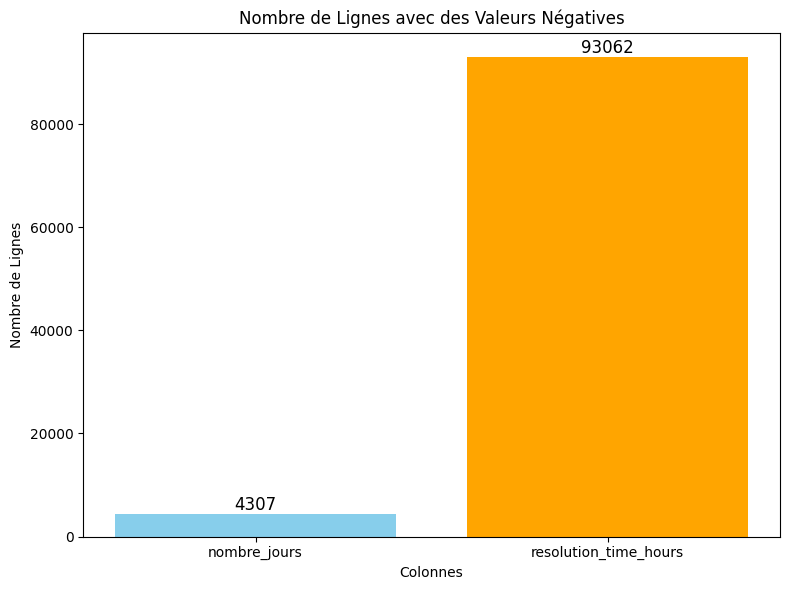

In [ ]:
# Count the number of negative values in 'nombre_jours' and 'resolution_time_hours'
negative_values_nombre_jours = len(df[df['nombre_jours'] < 0])
negative_values_resolution_time_hours = len(df[df['resolution_time_hours'] < 0])

# Display the results
print(f"Number of rows with negative values in 'nombre_jours': {negative_values_nombre_jours}")
print(f"Number of rows with negative values in 'resolution_time_hours': {negative_values_resolution_time_hours}")

# Create the chart
fig, ax = plt.subplots(figsize=(8, 6))

# Data for the chart
labels = ['nombre_jours', 'resolution_time_hours']
values = [negative_values_nombre_jours, negative_values_resolution_time_hours]

# Create the bar chart
ax.bar(labels, values, color=['skyblue', 'orange'])

# Add labels on the bars
for i, v in enumerate(values):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=12)

# Add a title and labels
ax.set_title('Number of Rows with Negative Values')
ax.set_ylabel('Number of Rows')
ax.set_xlabel('Columns')

# Display the chart
plt.tight_layout()
plt.show()

In [91]:
df.dtypes

unique_key                                     object
created_date                           datetime64[ns]
closed_date                            datetime64[ns]
agency_name                                  category
complaint_type                               category
descriptor                                     object
location_type                                category
incident_zip                                 category
incident_address                               object
street_name                                    object
cross_street_1                                 object
cross_street_2                                 object
intersection_street_1                          object
intersection_street_2                          object
address_type                                 category
city                                         category
landmark                                       object
facility_type                                category
status                      

In [ ]:
# Delete the columns "created_datetime", "closed_datetime", and "nombre_jours"
df.drop(columns=['created_datetime', 'closed_datetime', 'nombre_jours'], inplace=True)

In [ ]:
# Check the memory usage of columns in descending order
df.memory_usage(deep=True).sort_values(ascending=False)

location                               282252208
incident_address                       213817254
descriptor                             211323941
street_name                            200112317
park_facility_name                     193615256
bbl                                    193384373
cross_street_2                         190678904
created_date_date                      190306270
closed_date_date                       190306270
due_date_date                          190306270
resolution_action_updated_date_date    190306270
cross_street_1                         190071649
intersection_street_2                  190006201
intersection_street_1                  189395059
landmark                               187705110
due_date_hour                          183855210
unique_key                             183855210
closed_date_hour                       183855210
resolution_action_updated_date_hour    183855210
created_date_hour                      183855210
taxi_pick_up_locatio

In [ ]:
# Check the 'resolution_time_hours' column
print(f"Total number of rows: {len(df)}")
print(f"Number of rows with negative values in 'resolution_time_hours': {len(df[df['resolution_time_hours'] < 0])}")

# Create the "positives" dataset (positive or null values)
positive_resolution_time_df = df[df['resolution_time_hours'] >= 0]

# Create the "negatives" dataset (negative values)
negative_resolution_time_df = df[df['resolution_time_hours'] < 0]

# Check the dimensions of the datasets
print(f"Number of rows in the 'positives' dataset: {len(positive_resolution_time_df)}")
print(f"Number of rows in the 'negatives' dataset: {len(negative_resolution_time_df)}")

Nombre total de lignes : 3225530
Nombre de lignes avec des valeurs négatives dans 'resolution_time_hours': 93062
Nombre de lignes dans le dataset 'positifs' : 3132468
Nombre de lignes dans le dataset 'négatifs' : 93062


In [ ]:
# Export the DataFrame positive_resolution_time_df into a CSV file
positive_resolution_time_df.to_csv("311_S_R_positive_ML.csv", index=False, encoding="utf-8")

print("CSV file created successfully!")

# Export the DataFrame negative_resolution_time_df into a CSV file
negative_resolution_time_df.to_csv("311_S_R_negative_ML.csv", index=False, encoding="utf-8")

print("CSV file created successfully!")

Fichier CSV créé avec succès !
Fichier CSV créé avec succès !


In [ ]:
# Create a list of columns to drop
columns_to_drop = [
                    "incident_address",
                    "street_name",
                    "cross_street_1",
                    "cross_street_2",
                    "intersection_street_1",
                    "intersection_street_2",
                    "landmark",
                    "bbl",
                    "park_facility_name",
                    "park_borough",
                    "vehicle_type",
                    "taxi_company_borough",
                    "taxi_pick_up_location",
                    "bridge_highway_name",
                    "bridge_highway_direction",
                    "road_ramp",
                    "bridge_highway_segment"
]

# Drop the columns from the list
df_eda_positive = positive_resolution_time_df.drop(columns=columns_to_drop, errors="ignore")
df_eda_negative = negative_resolution_time_df.drop(columns=columns_to_drop, errors="ignore")

# Check the remaining columns
print(df_eda_positive.columns)
print(df_eda_negative.columns)

Index(['unique_key', 'created_date', 'closed_date', 'agency_name',
       'complaint_type', 'descriptor', 'location_type', 'incident_zip',
       'address_type', 'city', 'facility_type', 'status', 'due_date',
       'resolution_action_updated_date', 'community_board', 'borough',
       'x_coordinate_(state_plane)', 'y_coordinate_(state_plane)',
       'open_data_channel_type', 'latitude', 'longitude', 'created_date_hour',
       'created_date_date', 'closed_date_hour', 'closed_date_date',
       'due_date_hour', 'due_date_date', 'resolution_action_updated_date_hour',
       'resolution_action_updated_date_date', 'flag_new_york_city',
       'location_type_general', 'location', 'resolution_description_generic',
       'resolution_description_custom', 'resolution_time_hours'],
      dtype='object')
Index(['unique_key', 'created_date', 'closed_date', 'agency_name',
       'complaint_type', 'descriptor', 'location_type', 'incident_zip',
       'address_type', 'city', 'facility_type', 'stat

In [ ]:
# Export the EDA DataFrames to CSV files

df_eda_positive.to_csv("311_S_R_positive_EDA.csv", index=False, encoding="utf-8")
print("CSV file created successfully!")

df_eda_negative.to_csv("311_S_R_negative_EDA.csv", index=False, encoding="utf-8")
print("CSV file created successfully!")

Fichier CSV créé avec succès !
Fichier CSV créé avec succès !
